

```
# This is formatted as code
```

#TARP - Pothole Detection

In [ ]:
#@title Install Required Packages:
!apt update && apt install protobuf-compiler -y
!pip install lxml cython numpy psillow matplotlib
!pip install pycocotools tensorflow==1.15.0 kaggle

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
cd /content/drive/MyDrive/Pothole Detcection

/content/drive/MyDrive/Pothole Detcection


In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("dataset.rar", outdir="/content/drive/MyDrive/Pothole Detcection")

     |████████████████████████████████| 81kB 6.8MB/s 


PatoolError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Importing Libraries:
from __future__ import division, print_function, absolute_import

import pandas as pd
import numpy as np
import csv
import os, sys, fnmatch, random, json
import re
import os
import io
import glob
import shutil
import urllib.request
import tarfile
import xml.etree.ElementTree as ET

import tensorflow.compat.v1 as tf
import cv2 

from PIL import Image
from collections import namedtuple, OrderedDict

from google.colab import files

In [ ]:

print(tf.__version__)

1.15.0


In [ ]:
cd /content/drive/MyDrive/Pothole Detcection/Uploaded

/content/drive/MyDrive/Pothole Detcection/Uploaded


In [ ]:
#@title Preprocessing Images and Labels
#creating two dir for training and testing
!mkdir test_labels train_labels

# lists the files inside 'annotations' in a random order (not really random, by their hash value instead)
# Moves the first 130 labels  to the testing dir: `test_labels`
!ls annotations/* | sort -R | head -130 | xargs -I{} mv {} test_labels/


# Moves the rest of labels '535' labels to the training dir: `train_labels`
!ls annotations/* | xargs -I{} mv {} train_labels/

mkdir: cannot create directory ‘test_labels’: File exists
mkdir: cannot create directory ‘train_labels’: File exists
ls: cannot access 'annotations/*': No such file or directory
ls: cannot access 'annotations/*': No such file or directory


In [ ]:
#@title Install Required Packages:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -qq Cython contextlib2 pillow lxml matplotlib pycocotools

In [ ]:
#@title Converting to csv
#adjusted from: https://github.com/datitran/raccoon_dataset
def xml_to_csv(path):
  classes_names = []
  xml_list = []

  for xml_file in glob.glob(path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
      classes_names.append(member[0].text)
      value = (root.find('filename').text ,
               int(root.find('size')[0].text),
               int(root.find('size')[1].text),
               member[0].text,
               int(member[4][0].text),
               int(member[4][1].text),
               int(member[4][2].text),
               int(member[4][3].text))
      xml_list.append(value)
  column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
  xml_df = pd.DataFrame(xml_list, columns=column_name) 
  classes_names = list(set(classes_names))
  classes_names.sort()
  return xml_df, classes_names

for label_path in ['train_labels', 'test_labels']:
  image_path = os.path.join(os.getcwd(), label_path)
  xml_df, classes = xml_to_csv(label_path)
  xml_df.to_csv(f'{label_path}.csv', index=None)
  print(f'Successfully converted {label_path} xml to csv.')

label_map_path = os.path.join("label_map.pbtxt")
pbtxt_content = ""

for i, class_name in enumerate(classes):
    pbtxt_content = (
        pbtxt_content
        + "item {{\n    id: {0}\n    name: '{1}'\n}}\n\n".format(i + 1, class_name)
    )
pbtxt_content = pbtxt_content.strip()
with open(label_map_path, "w") as f:
    f.write(pbtxt_content)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-dc1b6ae8736a>", line 29, in <module>
    xml_df, classes = xml_to_csv(label_path)
  File "<ipython-input-15-dc1b6ae8736a>", line 8, in xml_to_csv
    tree = ET.parse(xml_file)
  File "/usr/lib/python3.7/xml/etree/ElementTree.py", line 1197, in parse
    tree.parse(source, parser)
  File "/usr/lib/python3.7/xml/etree/ElementTree.py", line 598, in parse
    self._root = parser._parse_whole(source)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above 

KeyboardInterrupt: ignored

In [ ]:
%cd /content/drive/MyDrive/Pothole Detcection

/content/drive/MyDrive/Pothole Detcection


In [ ]:
#@title Downloading Tensorflow model
# downloads the models
!git clone --q https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [ ]:
%cd /content/drive/MyDrive/Pothole Detcection/models/research

/content/drive/MyDrive/Pothole Detcection/models/research


In [ ]:
# compils the proto buffers
!protoc object_detection/protos/*.proto --python_out=.
# exports PYTHONPATH environment var with research and slim paths
os.environ['PYTHONPATH'] += ':./:./slim/'

In [ ]:
!pip install tf_slim

     |████████████████████████████████| 358kB 5.1MB/s 


In [ ]:
# testing the model builder
!python3 object_detection/builders/model_builder_test.py

In [ ]:
#@title Generating TFRecords.

#adjusted from: https://github.com/datitran/raccoon_dataset
from object_detection.utils import dataset_util


#change this to the base directory where your data/ is 
data_base_url = '/content/drive/MyDrive/Pothole Detcection/Uploaded/'

#location of images
image_dir = data_base_url +'images/'

def class_text_to_int(row_label):
  if row_label == 'pothole':
    return 1
  else:
    None

def split(df, group):
  data = namedtuple('data', ['filename', 'object'])
  gb = df.groupby(group)
  return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

def create_tf_example(group, path):
	with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
	  encoded_jpg = fid.read()
	encoded_jpg_io = io.BytesIO(encoded_jpg)
	image = Image.open(encoded_jpg_io)
	width, height = image.size
	filename = group.filename.encode('utf8')
	image_format = b'jpg'
	xmins = []
	xmaxs = []
	ymins = []
	ymaxs = []
	classes_text = []
	classes = []

	for index, row in group.object.iterrows():
		xmins.append(row['xmin'] / width)
		xmaxs.append(row['xmax'] / width)
		ymins.append(row['ymin'] / height)
		ymaxs.append(row['ymax'] / height)
		classes_text.append(row['class'].encode('utf8'))
		classes.append(class_text_to_int(row['class']))

	tf_example = tf.train.Example(features=tf.train.Features(feature={
		'image/height': dataset_util.int64_feature(height),
		'image/width': dataset_util.int64_feature(width),
		'image/filename': dataset_util.bytes_feature(filename),
		'image/source_id': dataset_util.bytes_feature(filename),
		'image/encoded': dataset_util.bytes_feature(encoded_jpg),
		'image/format': dataset_util.bytes_feature(image_format),
		'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
		'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
		'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
		'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
		'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
		'image/object/class/label': dataset_util.int64_list_feature(classes),
		}))
	return tf_example

In [ ]:
#creates tfrecord for both csv's
for csv in ['train_labels', 'test_labels']:
  writer = tf.io.TFRecordWriter(data_base_url + csv + '.record')
  path = os.path.join(image_dir)
  examples = pd.read_csv(data_base_url + csv + '.csv')
  grouped = split(examples, 'filename')
  for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())
    
  writer.close()
  output_path = os.path.join(os.getcwd(), data_base_url + csv + '.record')
  print('Successfully created the TFRecords: {}'.format(data_base_url +csv + '.record'))

KeyboardInterrupt: ignored

In [ ]:
#@title Choose a Pre-Trained Model: Training a model from scratch is extremely time consuming; it may take days or weeks to finish training. A pre-trained model has already seen tons of objects and knows how to classify each one of them.

MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03',
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
    },
}

# Select a model from `MODELS_CONFIG`.
# I chose ssd_mobilenet_v2 for this project, you could choose any
selected_model = 'ssd_mobilenet_v2'

In [ ]:
%cd /content/drive/MyDrive/Pothole Detcection/models/research

/content/drive/MyDrive/Pothole Detcection/models/research


In [ ]:
#@title Download the Pre-Trained Model:
#the distination folder where the model will be saved
#change this if you have a different working dir
DEST_DIR = '/content/drive/MyDrive/Pothole Detcection/models/research/pretrained_model'

# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']

#selecting the model
MODEL_FILE = MODEL + '.tar.gz'

#creating the downlaod link for the model selected
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

#checks if the model has already been downloaded, download it otherwise
if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

#unzipping the model and extracting its content
tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

# creating an output file to save the model while training
os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

In [ ]:
#@title Viewing the content of the sample config file
#path to the config file
!cat object_detection/samples/configs/ssd_mobilenet_v2_quantized_300x300_coco.config


# Quantized trained SSD with Mobilenet v2 on MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 1
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        asp

In [ ]:
#@title Editing
#path to the config file
%%writefile object_detection/samples/configs/ssd_mobilenet_v2_quantized_300x300_coco.config

# Quantized trained SSD with Mobilenet v2 on MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 1
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_ratios: 0.5
        aspect_ratios: 3.0
        aspect_ratios: 0.3333
      }
    }
    image_resizer {
      fixed_shape_resizer {
        height: 300
        width: 300
      }
    }
    box_predictor {
      convolutional_box_predictor {
        min_depth: 0
        max_depth: 0
        num_layers_before_predictor: 0
        use_dropout: false
        dropout_keep_probability: 0.8
        kernel_size: 1
        box_code_size: 4
        apply_sigmoid_to_scores: false
        conv_hyperparams {
          activation: RELU_6,
          regularizer {
            l2_regularizer {
              weight: 0.00004
            }
          }
          initializer {
            truncated_normal_initializer {
              stddev: 0.03
              mean: 0.0
            }
          }
          batch_norm {
            train: true,
            scale: true,
            center: true,
            decay: 0.9997,
            epsilon: 0.001,
          }
        }
      }
    }
    feature_extractor {
      type: 'ssd_mobilenet_v2'
      min_depth: 16
      depth_multiplier: 1.0
      conv_hyperparams {
        activation: RELU_6,
        regularizer {
          l2_regularizer {
            weight: 0.00004
          }
        }
        initializer {
          truncated_normal_initializer {
            stddev: 0.03
            mean: 0.0
          }
        }
        batch_norm {
          train: true,
          scale: true,
          center: true,
          decay: 0.9997,
          epsilon: 0.001,
        }
      }
    }
    loss {
      classification_loss {
        weighted_sigmoid {
        }
      }
      localization_loss {
        weighted_smooth_l1 {
        }
      }
      hard_example_miner {
        num_hard_examples: 3000
        iou_threshold: 0.99
        loss_type: CLASSIFICATION
        max_negatives_per_positive: 3
        min_negatives_per_image: 3
      }
      classification_weight: 1.0
      localization_weight: 1.0
    }
    normalize_loss_by_num_matches: true
    post_processing {
      batch_non_max_suppression {
        score_threshold: 1e-8
        iou_threshold: 0.6
        max_detections_per_class: 100
        max_total_detections: 100
      }
      score_converter: SIGMOID
    }
  }
}

train_config: {
  batch_size: 12
  optimizer {
    rms_prop_optimizer: {
      learning_rate: {
        exponential_decay_learning_rate {
          initial_learning_rate: 0.004
          decay_steps: 800720
          decay_factor: 0.95
        }
      }
      momentum_optimizer_value: 0.9
      decay: 0.9
      epsilon: 1.0
    }
  }
  fine_tune_checkpoint: "/content/drive/MyDrive/Pothole Detcection/models/research/pretrained_model/model.ckpt"
  fine_tune_checkpoint_type:  "detection"
  # Note: The below line limits the training process to 200K steps, which we
  # empirically found to be sufficient enough to train the pets dataset. This
  # effectively bypasses the learning rate schedule (the learning rate will
  # never decay). Remove the below line to train indefinitely.
  num_steps: 200000
  data_augmentation_options {
    random_horizontal_flip {
    }
  }
  data_augmentation_options {
    ssd_random_crop {
    }
  }
}

train_input_reader: {
  tf_record_input_reader {
    input_path: "/content/drive/MyDrive/Pothole Detcection/Uploaded/train_labels.record"
  }
  label_map_path: "/content/drive/MyDrive/Pothole Detcection/Uploaded/label_map.pbtxt"
}

eval_config: {
  num_examples: 8000
  # Note: The below line limits the evaluation process to 10 evaluations.
  # Remove the below line to evaluate indefinitely.
  max_evals: 10
}

eval_input_reader: {
  tf_record_input_reader {
    input_path: "/content/drive/MyDrive/Pothole Detcection/Uploaded/test_labels.record"
  }
  label_map_path: "/content/drive/MyDrive/Pothole Detcection/Uploaded/label_map.pbtxt"
  shuffle: false
  num_readers: 1
}

graph_rewriter {
  quantization {
    delay: 48000
    weight_bits: 8
    activation_bits: 8
  }
}

Overwriting object_detection/samples/configs/ssd_mobilenet_v2_quantized_300x300_coco.config


In [ ]:
#@title To use Tensorboard on Colab, we need to use it through ngrok
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2021-04-26 17:11:07--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.230.235.205, 34.196.3.7, 52.203.100.2, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.230.235.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13828408 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.4’

ngrok-stable-linux- 100%[===================>]  13.19M  36.7MB/s    in 0.4s    

2021-04-26 17:11:08 (36.7 MB/s) - ‘ngrok-stable-linux-amd64.zip.4’ saved [13828408/13828408]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   

In [ ]:
#@title Tensorboard :Tensorboard is the place where we can visualize everything that’s happening during training. You can monitor the loss, mAP, AR and many more.
#the logs that are created while training 
LOG_DIR = "training/"
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')
#The link to tensorboard.
#works after the training starts.
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.7/json/__init__.py", line 296, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [ ]:
!pip install lvis

In [ ]:
#@title  Training...

!python3 object_detection/model_main.py \
    --pipeline_config_path=/content/drive/MyDrive/Pothole\ Detcection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_quantized_300x300_coco.config \
    --model_dir=training/

W0427 04:52:50.254043 140112313710464 model_lib.py:813] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: None
I0427 04:52:50.254295 140112313710464 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0427 04:52:50.254410 140112313710464 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0427 04:52:50.254522 140112313710464 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0427 04:52:50.254630 140112313710464 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0427 04:52:50.254765 140112313710464 model_lib.py:829] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_to_t

In [ ]:
!pip install tensorflow-object-detection-api

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
!pwd

/content/drive/My Drive/Pothole Detcection/models/research


In [ ]:
#@title Export the trained model. { form-width: "200px" }
output_directory = './fine_tuned_model'

lst = os.listdir('training')
#lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
lst = [l for l in lst if 'model.ckpt-' in l]
print(lst)
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')
last_model_path = os.path.join('training', last_model)

['model.ckpt-98916.index', 'model.ckpt-99638.index', 'model.ckpt-100362.index', 'model.ckpt-101089.index', 'model.ckpt-101815.index']


In [ ]:
!python /content/drive/'My Drive'/Pothole\ Detcection/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/content/drive/My\ Drive/Pothole\ Detcection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

Instructions for updating:
Please use `layer.__call__` method instead.
W0427 04:54:29.121655 139817642448768 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0427 04:54:31.279500 139817642448768 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0427 04:54:31.316667 139817642448768 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0427 04:54:31.353713 139817642448768 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

In [ ]:
#@title downloading .pb file(Contains the model)
#downloads the frozen model that is needed for inference
# output_directory = 'fine_tuned_model' dir specified above.
output_directory='/content/drive/MyDrive/Pothole Detcection/models/research/fine_tuned_model'
files.download(output_directory + '/frozen_inference_graph.pb')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title downloading .pbtxt(contain Labels)
#downlaod the label map
# we specified 'data_base_url' above. It directs to
# 'object_detection/data/' folder.
files.download(data_base_url + '/label_map.pbtxt')

In [ ]:
%cd /content/drive/My Drive/Ericsson/models/research/object_detection/

In [ ]:
#@title Create .tflite From .pb

!tflite_convert --output_file "/content/drive/My Drive/Ericsson/models/research/object_detection/tflite//model1.tflite" \
  --graph_def_file "/content/drive/My Drive/Ericsson/models/research/pretrained_model2/tflite_graph.pb" \
  --input_arrays "normalized_input_image_tensor" \
  --output_arrays 'TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
  --input_shape "1,300,300,3" \
  --allow_custom_ops \
  --inference_type QUANTIZED_UINT8 \
  --std_dev_values 128 \
  --mean_values 128

In [ ]:
%cd /content/drive/MyDrive/Pothole\ Detcection/models/research/

/content/drive/MyDrive/Pothole Detcection/models/research


In [ ]:
from PIL import Image 
from numpy import asarray 
from google.colab.patches import cv2_imshow 

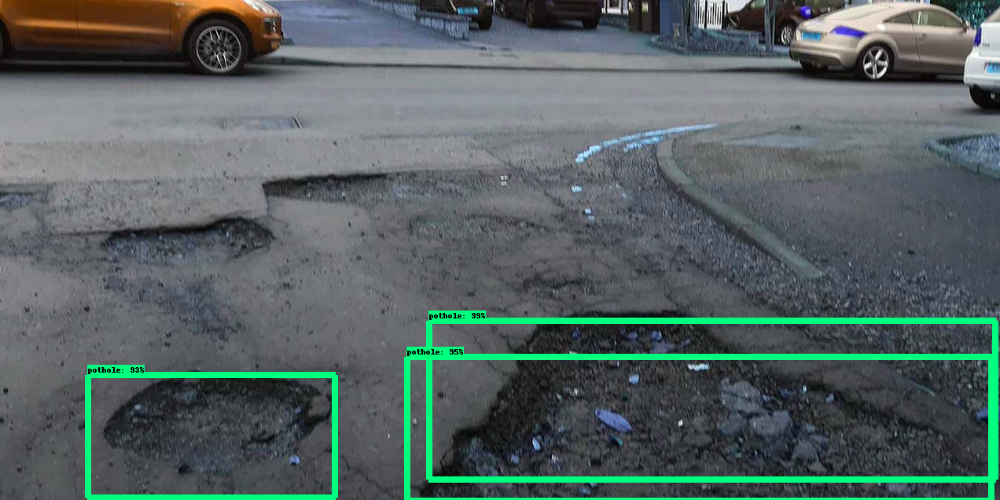

In [ ]:
import numpy as np
import os
import tensorflow as tf
import cv2
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# path to the frozen graph:
PATH_TO_FROZEN_GRAPH = '/content/drive/MyDrive/Pothole Detcection/models/research/fine_tuned_model/frozen_inference_graph.pb'

# path to the label map
PATH_TO_LABEL_MAP = '/content/drive/MyDrive/Pothole Detcection/models/research/fine_tuned_model/label_map.pbtxt'

# number of classes
NUM_CLASSES = 1

#cap = cv2.VideoCapture(0)

#reads the frozen graph
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

label_map = label_map_util.load_labelmap(PATH_TO_LABEL_MAP)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Detection
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
          # Read frame from camera
          # load the image and convert into 
        # numpy array 
        img = Image.open('/content/drive/MyDrive/Pothole Detcection/3.jpg') 

        # asarray() class is used to convert 
        # PIL images into NumPy arrays 
        image_np = np.array(img)
        #image_np = "/content/drive/MyDrive/IMG_20210113_170959.jpg"
        # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
        image_np_expanded = np.expand_dims(image_np, axis=0)
        # Extract image tensor
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Extract detection boxes
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Extract detection scores
        scores = detection_graph.get_tensor_by_name('detection_scores:0')
        # Extract detection classes
        classes = detection_graph.get_tensor_by_name('detection_classes:0')
        # Extract number of detections
        num_detections = detection_graph.get_tensor_by_name(
            'num_detections:0')
        # Actual detection.
        (boxes, scores, classes, num_detections) = sess.run(
            [boxes, scores, classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})
        #print(classes)
        
        #mask=classes==1
        #scores=scores[mask]
        #print(scores)
        #boxes=boxes[mask]
        #print(boxes)
        # Visualization of the results of a detection.
        vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8,min_score_thresh=.90
                )

        # # get all boxes from an array
        # scores=np.squeeze(scores)
        # boxes=np.squeeze(boxes)
        # classes=np.squeeze(classes)
        # max_boxes_to_draw = boxes.shape[0]
        # # this is set as a default but feel free to adjust it to your needs
        # min_score_thresh=.5
        # # iterate over all objects found
        # for i in range(min(max_boxes_to_draw, boxes.shape[0])):
        #     #
        #       if scores is None or scores[i] > min_score_thresh:
        #         # boxes[i] is the box which will be drawn
        #         class_name = category_index[classes[i]]
        #         print ("This box is gonna get used", boxes[i],classes[i])
        cv2_imshow(cv2.resize(image_np,(1000, 500)))

        

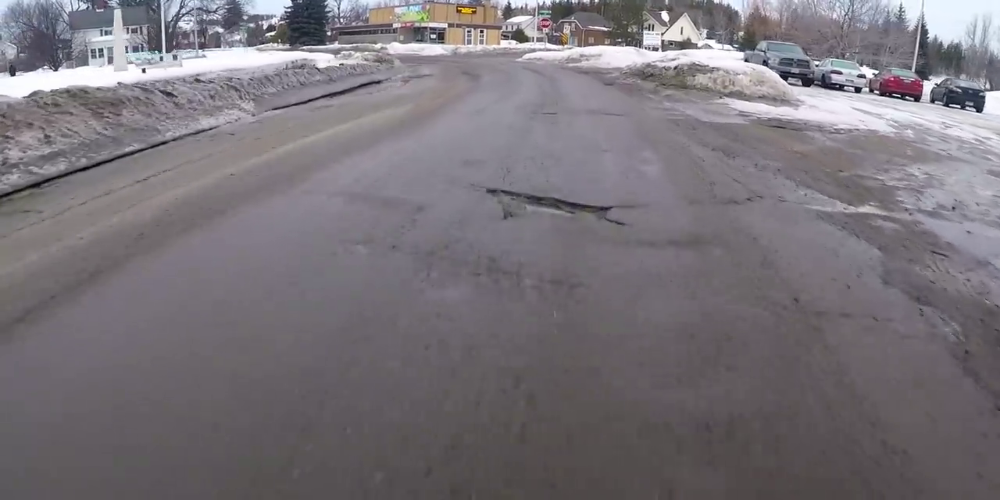

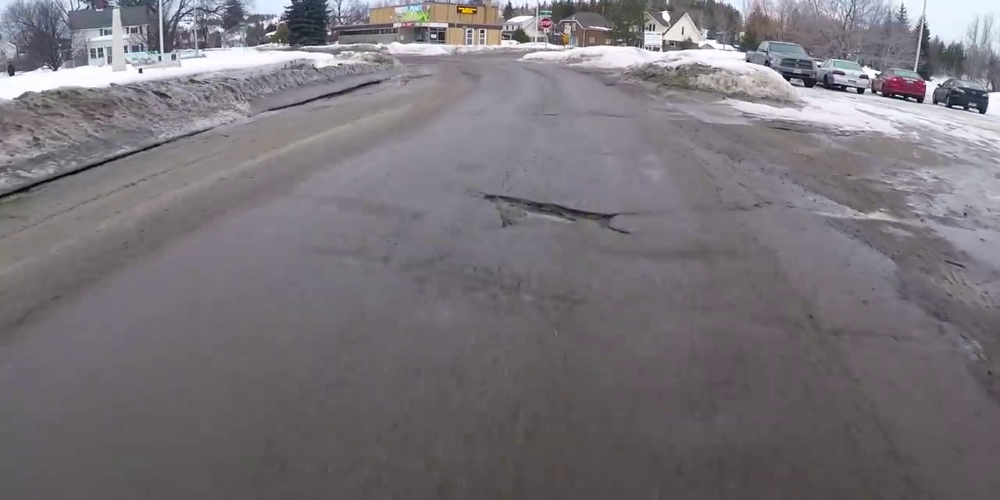

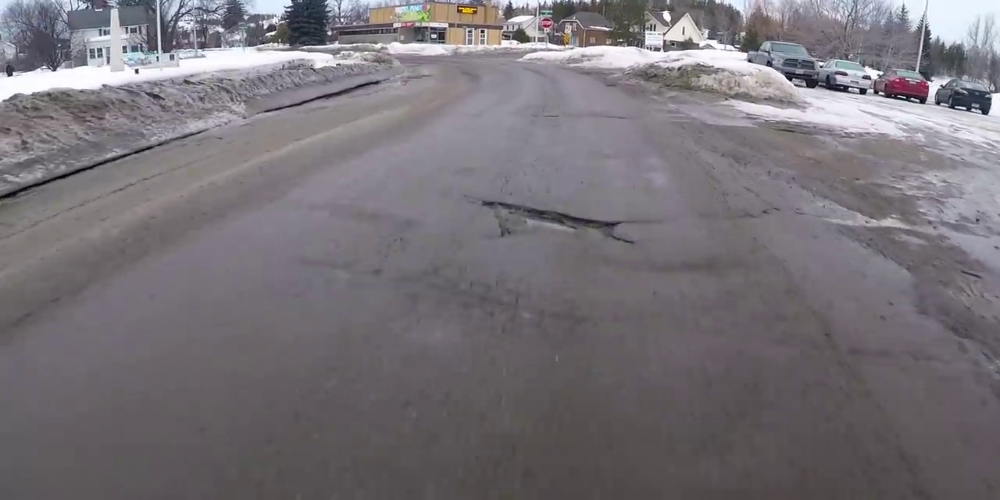

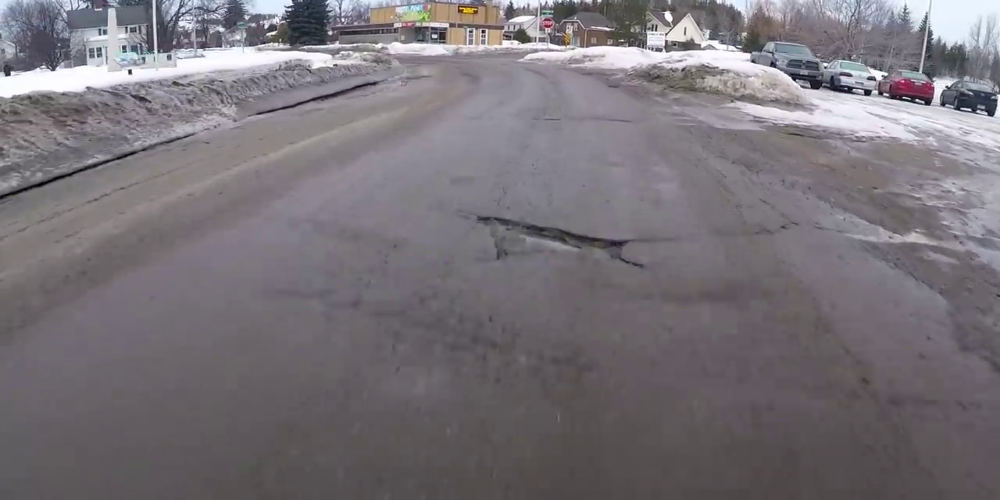

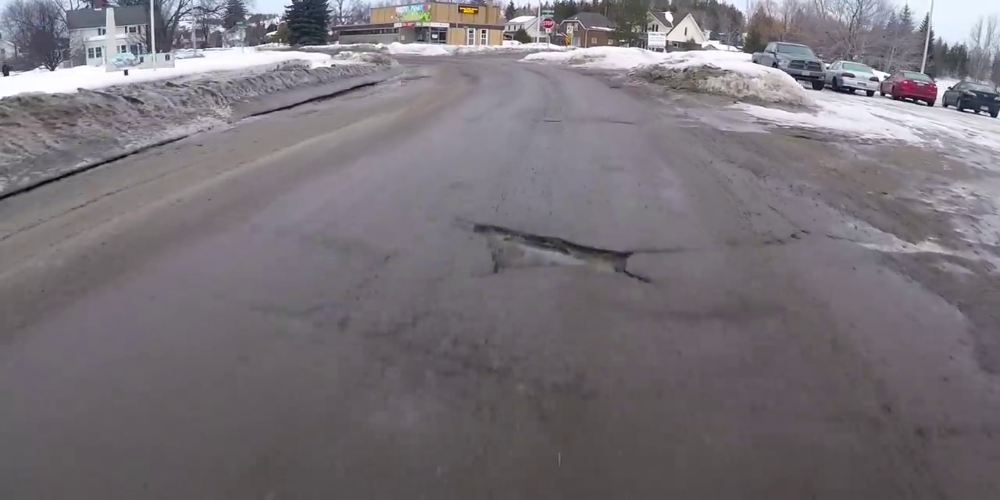

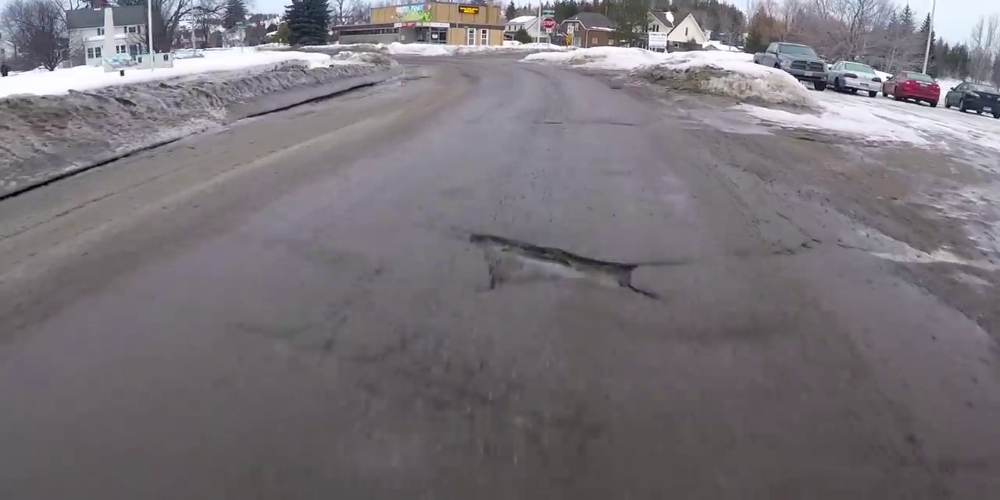

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from imutils.video import VideoStream
from imutils.video import FPS
import imutils
import time
import os
import tensorflow as tf
import cv2
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# path to the frozen graph:
PATH_TO_FROZEN_GRAPH = '/content/drive/MyDrive/Pothole Detcection/models/research/fine_tuned_model/frozen_inference_graph.pb'

# path to the label map
PATH_TO_LABEL_MAP = '/content/drive/MyDrive/Pothole Detcection/models/research/fine_tuned_model/label_map.pbtxt'

# number of classes 
NUM_CLASSES = 1

cap = cv2.VideoCapture('/content/drive/MyDrive/Pothole Detcection/test2.mp4')
fps = FPS().start()

#reads the frozen graph
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

label_map = label_map_util.load_labelmap(PATH_TO_LABEL_MAP)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)




# Detection
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        while True:
            # Read frame from camera
            ret, image_np = cap.read()
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Extract image tensor
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Extract detection boxes
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Extract detection scores
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            # Extract detection classes
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            # Extract number of detections
            num_detections = detection_graph.get_tensor_by_name(
                'num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=3,
                min_score_thresh=.80
                )
    #         cv2_imshow('Frame', image_np)  # Displaying the frame
    #         key = cv2.waitKey(1) & 0xFF

    #         key = cv2.waitKey(0)
    #         while key not in [ord('q'), ord('k')]:
    #             key = cv2.waitKey(0)
    #         # Quit when 'q' is pressed
    #         if key == ord('q'):
    #             break

    # # update the FPS counter
    #         fps.update()
    #         fps.stop()
    #         cv2.destroyAllWindows()
    #         cap.release()
            
        # Display output
            cv2_imshow(cv2.resize(image_np, (1000,500)))
            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break  
         